
 Optimal Lambda:  0.38898566818331004


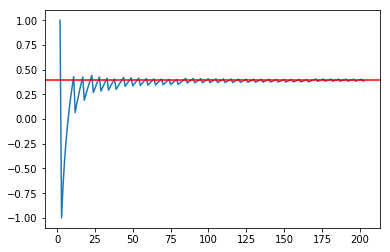


 Optimal Cost:  5.384035173133806


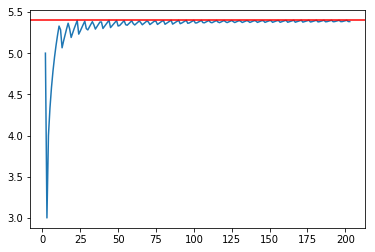

In [49]:
import numpy as np
from scipy.optimize import linprog
from basic_utils import nn2na
import matplotlib.pyplot as plt


# Node-Node matrix
NN = np.array([[0, 1, 1, 0, 0, 0],   #s
               [0, 0, 0, 1, 0, 1],   #2
               [0, 0, 0, 0, 1, 0],   #3
               [0, 0, 0, 0, 0, 1],   #4
               [0, 0, 0, 0, 0, 1],   #5
               [0, 0, 0, 0, 0, 0]])  #t
                     

# A matrix, which is Node-arc matrix. Arcs is a tuple with dim(arcs) = #arcs in the graph
Aeq, arcs = nn2na(NN) 
t = np.array([[3, 1, 3, 1, 3, 3, 5]])

# Cost matrix. Dim(C) = #Arcs
C = np.array([2, 1, 2, 5, 2, 1, 2])

# b Vector. Dim(b) = #nodes
beq = [1, 0, 0, 0, 0, -1]
T = 8


# Bounds: 0 por lower, Inf for Upper.
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])
    

def getCm(lam):
    return C + lam * t[0]

# print("Input arguments:\n\n",
# "\n- Aeq matrix:\n", Aeq,
# "\n- Cost matrix: \n", C,
# "\n- beq vector: \n", beq,
# "\n- Bounds: \n", bounds
# )

x = []
y1 = []
y2 = []
L = 0
lam = 0
tol = 0.005
i = 1
diff = 1

while diff > tol:
    Cm = getCm(lam)
    result = linprog(Cm, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')
    L = result.fun - lam * T
    grad = np.dot(t[0],result.x) - T
    step = 1/i
    lamNext = lam + step * grad
    diff = np.abs(lamNext - lam)
    lam = lamNext
    i+=1
    x.append(i)
    y1.append(lam)
    y2.append(L)

print("\n Optimal Lambda: ", lam)
plt.plot(x, y1)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.show()

print("\n Optimal Cost: ", L)
plt.plot(x, y2)
plt.axhline(y=5.4, color='r', linestyle='-')
plt.show()